# Titanic Case Study

# Variable Notes

- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.

# Perform followings on dataset:
- Read the dataset and display top/bottom rows
- Get a summary of whole dataset
- Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
- Drop those columns which needs to be dropped
- Find out the data type of each column
- Find out the number of entries in each column
- Find out which columns is having more number of missing values
- Replace missing values in each column and provide the reason for choosing one function to replace missing values
- Fix the issue with fare column usign regex flag then type casting of the whole column 
- Find out total number of Male/Female passengers
- Find out total number of passengers in each passenger class
- Find out total number of Survived/Not-survived passengers
- Find out total number of passengers of various age groups (0-30, 31-60 and >60)
- Find out which age group survived
- Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_dataset_modified.csv')

#### Assumptions

- Look for catagorical columns
- We can drop columns which has all the unique values, like - Name, ticket(PNR) also columns which has lots of missing values.
- Write EDA - Exploratory Data Analysis, means, any assumptions in the data, like filling missing values.
- Look for variations in the data.
- columns like fare, remove spaces, remove $ and typecaste to float.
- Columns are features
- rows are observations
- for missong value in the str catagorical column use mode to fill the cells.
- for numbers, fille mean or median.


In [2]:
# - Read the dataset and display top/bottom rows
df.head(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.tail(2)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1307,1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,$7.23,NaN,C,NaN,NaN,NaN
1308,1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,$7.88,NaN,S,NaN,NaN,NaN


In [4]:
# - Get a summary of whole dataset
df.describe()  # describe will bydefault take numerical columns

,Unnamed: 0,pclass,survived,age,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,121.000000
mean,654.000000,2.294882,0.381971,29.881135,0.498854,0.385027,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000
25%,327.000000,2.000000,0.000000,21.000000,0.000000,0.000000,72.000000
50%,654.000000,3.000000,0.000000,28.000000,0.000000,0.000000,155.000000
75%,981.000000,3.000000,1.000000,39.000000,1.000000,0.000000,256.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,328.000000


In [5]:
df.describe(include="all")

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308,295,1307,486,121.000000,745
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,263,186,3,27,NaN,369
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,$8.05,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,60,6,914,39,NaN,64
mean,654.000000,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,NaN,NaN,NaN,NaN,160.809917,NaN
std,378.020061,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,NaN,NaN,NaN,NaN,97.696922,NaN
min,0.000000,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,327.000000,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,72.000000,NaN
50%,654.000000,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,155.000000,NaN
75%,981.000000,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,256.000000,NaN


In [13]:
df.head(1)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"


In [7]:
# - Drop those columns which needs to be dropped
# - Analyse the data and find out the columns which will not be part of further data analysis and provide the reason why?
df.drop(["Unnamed: 0", "name", "ticket","cabin","boat","home.dest"], axis=1, inplace=True)

In [8]:
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked,body
0,1,1,female,29.0000,0,0,$211.34,S,NaN
1,1,1,male,0.9167,1,2,$151.55,S,NaN


In [26]:
# - Find out the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
gender      1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null object
embarked    1307 non-null object
body        121 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [32]:
df.dtypes

pclass        int64
survived      int64
gender       object
age         float64
sibsp         int64
parch         int64
fare         object
embarked     object
body        float64
dtype: object

In [ ]:
Size: will take all the entries including NaN
count: will take only non-null values

In [6]:
# - Find out the number of entries in each column
for k in df.keys():
    print('Totoal number of values in {} is {}'.format(k, df[k].count()))

Totoal number of values in Unnamed: 0 is 1309
Totoal number of values in pclass is 1309
Totoal number of values in survived is 1309
Totoal number of values in name is 1309
Totoal number of values in gender is 1309
Totoal number of values in age is 1046
Totoal number of values in sibsp is 1309
Totoal number of values in parch is 1309
Totoal number of values in ticket is 1309
Totoal number of values in fare is 1308
Totoal number of values in cabin is 295
Totoal number of values in embarked is 1307
Totoal number of values in boat is 486
Totoal number of values in body is 121
Totoal number of values in home.dest is 745


In [ ]:
# - Find out which columns is having more number of missing values

In [7]:
df.age.isnull().sum()

263

In [8]:
df.isnull().sum()

Unnamed: 0       0
pclass           0
survived         0
name             0
gender           0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64

In [9]:
for n in df.keys():
    print('Total % of missing values in {} is {:.2f}%'.format(n, ((df[n].isnull().sum())/df.age.size)*100))

Total % of missing values in Unnamed: 0 is 0.00%
Total % of missing values in pclass is 0.00%
Total % of missing values in survived is 0.00%
Total % of missing values in name is 0.00%
Total % of missing values in gender is 0.00%
Total % of missing values in age is 20.09%
Total % of missing values in sibsp is 0.00%
Total % of missing values in parch is 0.00%
Total % of missing values in ticket is 0.00%
Total % of missing values in fare is 0.08%
Total % of missing values in cabin is 77.46%
Total % of missing values in embarked is 0.15%
Total % of missing values in boat is 62.87%
Total % of missing values in body is 90.76%
Total % of missing values in home.dest is 43.09%


In [10]:
# age, fare, embarked

In [11]:
df.age.mean()

29.8811345124283

In [12]:
# - Replace missing values in each column and provide the reason for choosing one function to replace missing values

df.age.fillna(df.age.mean(), inplace=True)


In [13]:
df.age.isnull().sum()

0

In [14]:
df.head(1)

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,$211.34,B5,S,2,NaN,"St Louis, MO"


In [15]:
df.embarked.isnull().sum()

2

### How to count unique values

In [67]:
df.embarked.value_counts()  #Total number of count for each category (Duplicate values)

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [80]:
df.embarked.mode()

0    S
dtype: object

In [81]:
df.embarked.mode()[0]

'S'

In [82]:
df.embarked.fillna(df.embarked.mode()[0], inplace=True)

In [78]:
df.embarked.isnull().sum()

0

In [83]:
# - Fix the issue with fare column usign regex flag then type casting of the whole column 

SyntaxError: invalid syntax (<ipython-input-83-626c93171978>, line 1)

In [10]:
df.fare.head(2)

0    $211.34
1    $151.55
Name: fare, dtype: object

In [16]:
df.fare.astype("float64")

ValueError: could not convert string to float: '$211.34'

In [18]:
# still not replacing $
# df.fare.replace({"\$":''},inplace=True)  

In [19]:
df.fare.replace({'\$':''}, regex=True)

0       211.34
1       151.55
2       151.55
3       151.55
4       151.55
         ...  
1304     14.45
1305     14.45
1306      7.23
1307      7.23
1308      7.88
Name: fare, Length: 1309, dtype: object

In [20]:
# - Find out total number of Male/Female passengers
df.fare.dtypes()

TypeError: 'numpy.dtype' object is not callable

In [9]:
df.fare = df.fare.astype('float64')

ValueError: could not convert string to float: '$211.34'

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_clean_data.csv')

In [24]:
# - Find out total number of passengers in each passenger class \\/\/

In [26]:
df.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

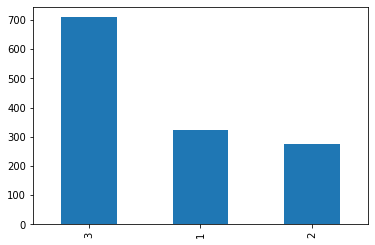

In [27]:
df.pclass.value_counts().plot(kind='bar')

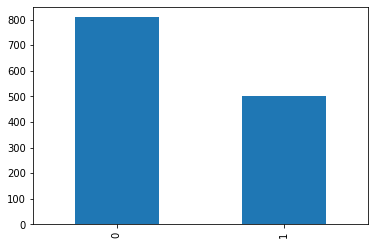

In [30]:
# - Find out total number of Survived/Not-survived passengers

df.survived.value_counts().plot(kind='bar')

In [31]:
df.head(2)

,Unnamed: 0,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,0,1,1,female,29.0000,0,0,211.34,S
1,1,1,1,male,0.9167,1,2,151.55,S


In [ ]:
# - Find out total number of passengers of various age groups (0-30, 31-60 and >60)


for i in age():
    for age >=0 & < 31:
        print()


In [32]:
# df[df.age<=30]

,Unnamed: 0,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,0,1,1,female,29.000000,0,0,211.34,S
1,1,1,1,male,0.916700,1,2,151.55,S
2,2,1,0,female,2.000000,1,2,151.55,S
3,3,1,0,male,30.000000,1,2,151.55,S
4,4,1,0,female,25.000000,1,2,151.55,S
...,...,...,...,...,...,...,...,...,...
1304,1304,3,0,female,14.500000,1,0,14.45,C
1305,1305,3,0,female,29.881135,1,0,14.45,C
1306,1306,3,0,male,26.500000,0,0,7.23,C
1307,1307,3,0,male,27.000000,0,0,7.23,C


In [39]:
age1 = df.age[df.age<=30]
age2 = df.age[(df.age>30) & (df.age<=60)]
age3 = df.age[df.age>60]

In [40]:
age1.size  # age.count

872

In [42]:
age2.size

404

In [45]:
age3.size

33

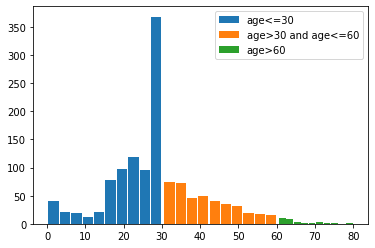

In [50]:
plt.hist(age1,rwidth=.9,label='age<=30')
plt.hist(age2,rwidth=.9,label='age>30 and age<=60')
plt.hist(age3,rwidth=.9,label='age>60')
plt.legend()
plt.show()

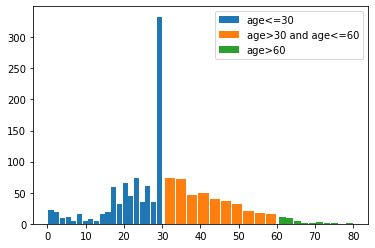

In [53]:
plt.hist(age1,bins=20,rwidth=.9,label='age<=30') # more the bin size, more granuality
plt.hist(age2,rwidth=.9,label='age>30 and age<=60')
plt.hist(age3,rwidth=.9,label='age>60')
plt.legend()
plt.show()

In [ ]:
- Find out which age group survived

In [3]:
# - Find out total number of passengers city ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

Try at home

SyntaxError: invalid syntax (<ipython-input-3-16c82cd51d91>, line 1)

# grouping concept

In [ ]:
- Find out total number of passengers city(embarked) ((C = Cherbourg; Q = Queenstown; S = Southampton)) Vs PassengerClass

In [54]:
grp = df.groupby(['pclass', 'embarked'])

In [55]:
grp

In [56]:
grp.groups

{(1, 'C'): Int64Index([  9,  10,  11,  12,  16,  17,  18,  19,  22,  23,
             ...
             303, 304, 308, 312, 313, 314, 316, 317, 319, 322],
            dtype='int64', length=141),
 (1, 'Q'): Int64Index([206, 207, 208], dtype='int64'),
 (1, 'S'): Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  13,
             ...
             305, 306, 307, 309, 310, 311, 315, 318, 320, 321],
            dtype='int64', length=179),
 (2,
  'C'): Int64Index([323, 324, 391, 392, 401, 402, 465, 478, 479, 480, 481, 482, 485,
             491, 492, 493, 494, 495, 512, 513, 520, 524, 526, 531, 538, 539,
             547, 566],
            dtype='int64'),
 (2, 'Q'): Int64Index([469, 470, 472, 477, 487, 511, 562], dtype='int64'),
 (2, 'S'): Int64Index([325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
             ...
             590, 591, 592, 593, 594, 595, 596, 597, 598, 599],
            dtype='int64', length=242),
 (3,
  'C'): Int64Index([ 607,  613,  647,  648,  650,  651,  653,  

In [57]:
grp.groups.keys()

dict_keys([(1, 'C'), (1, 'Q'), (1, 'S'), (2, 'C'), (2, 'Q'), (2, 'S'), (3, 'C'), (3, 'Q'), (3, 'S')])

In [59]:
len(grp.groups.keys())

9

In [63]:
grp.get_group((1, 'C')).pclass.count()

141

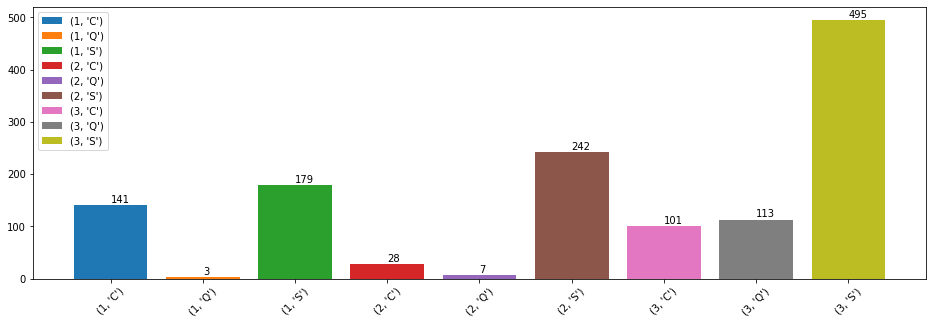

In [82]:
plt.figure(figsize=(16,5))
for k in grp.groups.keys():
    
    plt.bar(str(k),grp.get_group(k).pclass.count(),label=str(k))
    plt.text(str(k),grp.get_group(k).pclass.count()+5, grp.get_group(k).pclass.count())
#     plt.bar(str(k),grp.get_group(k).pclass.count(),label=str(k))
plt.legend()
plt.xticks(rotation=45)
plt.show()

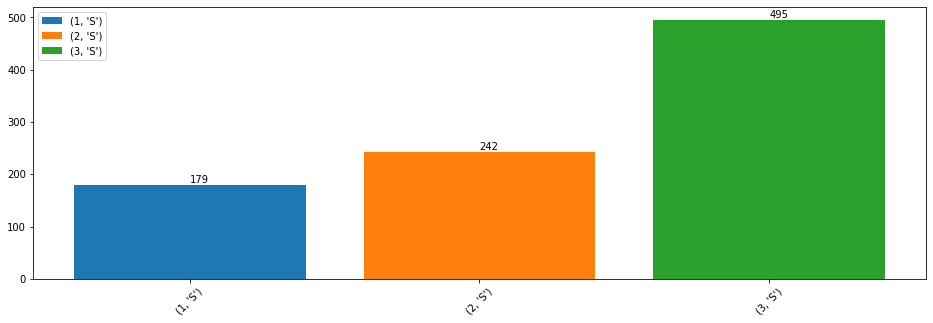

In [86]:
plt.figure(figsize=(16,5))
for k in grp.groups.keys():
    if 'S' in k and 3:
        plt.bar(str(k),grp.get_group(k).pclass.count(),label=str(k))
        plt.text(str(k),grp.get_group(k).pclass.count()+5, grp.get_group(k).pclass.count())
#     plt.bar(str(k),grp.get_group(k).pclass.count(),label=str(k))
plt.legend()
plt.xticks(rotation=45)
plt.show()

# sorting, joining, merging,dropna

In [91]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("DEF"))

In [92]:
df1

,A,B,C
0,1,2,4
1,3,4,3
2,3,2,1
3,4,4,3
4,1,3,3


In [97]:
df2

,D,E,F
0,2,3,3
1,4,2,4
2,3,1,1
3,4,1,1
4,3,1,4


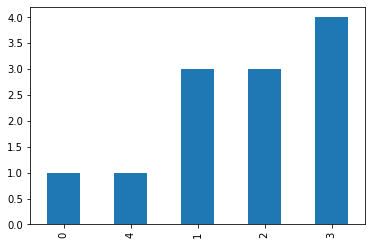

In [102]:
df1.sort_values(by="A").A.plot(kind='bar')

In [ ]:
df1.A.plot.(kind)

In [96]:
df1.sort_values(by="A" and "B")

,A,B,C
0,1,2,4
2,3,2,1
4,1,3,3
1,3,4,3
3,4,4,3


# Joining

In [103]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("DEF"))

In [104]:
df1.join(df2)

,A,B,C,D,E,F
0,3,1,4,4,2,3
1,4,1,3,4,2,1
2,4,3,4,2,1,4
3,4,1,3,1,4,2
4,3,4,1,3,1,1


In [105]:
df1.join(df2[['D','F']])

,A,B,C,D,F
0,3,1,4,4,3
1,4,1,3,4,1
2,4,3,4,2,4
3,4,1,3,1,2
4,3,4,1,3,1


In [106]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("CEF"))

In [107]:
df1.join(df2,lsuffix="_L", rsuffix="_R")

,A,B,C_L,C_R,E,F
0,3,3,2,2,2,2
1,2,1,2,3,2,1
2,1,3,4,4,4,3
3,1,3,3,1,4,1
4,3,3,2,4,3,3


## Merging
some common column si there

In [131]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("CEF"))

In [132]:
df1

,A,B,C
0,1,3,4
1,1,2,4
2,3,1,1
3,3,4,3
4,1,3,4


In [133]:
df2

,C,E,F
0,4,3,1
1,1,2,1
2,4,2,3
3,4,3,2
4,1,4,1


In [134]:
df1.merge(df2,how='left')

,A,B,C,E,F
0,1,3,4,3.0,1.0
1,1,3,4,2.0,3.0
2,1,3,4,3.0,2.0
3,1,2,4,3.0,1.0
4,1,2,4,2.0,3.0
5,1,2,4,3.0,2.0
6,3,1,1,2.0,1.0
7,3,1,1,4.0,1.0
8,3,4,3,NaN,NaN
9,1,3,4,3.0,1.0


In [135]:
df1.merge(df2,how='left', indicator=True)

,A,B,C,E,F,_merge
0,1,3,4,3.0,1.0,both
1,1,3,4,2.0,3.0,both
2,1,3,4,3.0,2.0,both
3,1,2,4,3.0,1.0,both
4,1,2,4,2.0,3.0,both
5,1,2,4,3.0,2.0,both
6,3,1,1,2.0,1.0,both
7,3,1,1,4.0,1.0,both
8,3,4,3,NaN,NaN,left_only
9,1,3,4,3.0,1.0,both


In [136]:
df1.merge(df2,how='inner', indicator=True)

,A,B,C,E,F,_merge
0,1,3,4,3,1,both
1,1,3,4,2,3,both
2,1,3,4,3,2,both
3,1,2,4,3,1,both
4,1,2,4,2,3,both
5,1,2,4,3,2,both
6,1,3,4,3,1,both
7,1,3,4,2,3,both
8,1,3,4,3,2,both
9,3,1,1,2,1,both


In [137]:
df1.merge(df2,how='right', indicator=True)

,A,B,C,E,F,_merge
0,1,3,4,3,1,both
1,1,2,4,3,1,both
2,1,3,4,3,1,both
3,1,3,4,2,3,both
4,1,2,4,2,3,both
5,1,3,4,2,3,both
6,1,3,4,3,2,both
7,1,2,4,3,2,both
8,1,3,4,3,2,both
9,3,1,1,2,1,both


In [138]:
df1.merge(df2,how='outer', indicator=True)

,A,B,C,E,F,_merge
0,1,3,4,3.0,1.0,both
1,1,3,4,2.0,3.0,both
2,1,3,4,3.0,2.0,both
3,1,2,4,3.0,1.0,both
4,1,2,4,2.0,3.0,both
5,1,2,4,3.0,2.0,both
6,1,3,4,3.0,1.0,both
7,1,3,4,2.0,3.0,both
8,1,3,4,3.0,2.0,both
9,3,1,1,2.0,1.0,both


In [141]:
df1.append(df2,ignore_index=True)

C:\Users\pkmb\AppData\Local\Continuum\anaconda3_1\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,A,B,C,E,F
0,1.0,3.0,4,NaN,NaN
1,1.0,2.0,4,NaN,NaN
2,3.0,1.0,1,NaN,NaN
3,3.0,4.0,3,NaN,NaN
4,1.0,3.0,4,NaN,NaN
5,NaN,NaN,4,3.0,1.0
6,NaN,NaN,1,2.0,1.0
7,NaN,NaN,4,2.0,3.0
8,NaN,NaN,4,3.0,2.0
9,NaN,NaN,1,4.0,1.0


In [146]:
df1 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))
df2 = pd.DataFrame(np.random.randint(1,5,15).reshape(5,3),columns=list("ABC"))

In [148]:
df1.append(df2,ignore_index=True)

,A,B,C
0,2,3,4
1,1,4,2
2,4,2,1
3,4,2,3
4,2,4,3
5,4,1,3
6,4,4,2
7,4,4,4
8,2,1,3
9,4,1,4


## datetime

In [152]:
pd.date_range(start='01-01-2019', end='15-02-2019',freq="H").size

1081

In [154]:
pd.date_range(start='01-01-2019', end='15-02-2019',freq="D")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15'],
              dtype='datetime64[ns]', freq='D')

In [156]:
s=pd.Series(np.random.randint(1,100,46),index='date')

TypeError: Index(...) must be called with a collection of some kind, 'date' was passed